In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Load the crop recommendation dataset (replace 'crop_data.csv' with your file)
data = pd.read_csv('/content/Crop_recommendation.csv')



In [ ]:
data.head() # print first 5 rows from the dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.isnull().sum() # calculating the null values in each columns

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'])
X = data.drop(['label'], axis=1)
y = data['label']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Initialize base classifiers
base_classifiers = [
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression()
]

# Initialize Bagging models with base classifiers
bagging_models = [
    BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
    for base_classifier in base_classifiers
]



In [ ]:
# Train and evaluate Bagging models
accuracies = []
for model in bagging_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Model names for plotting
model_names = [ 'K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression']



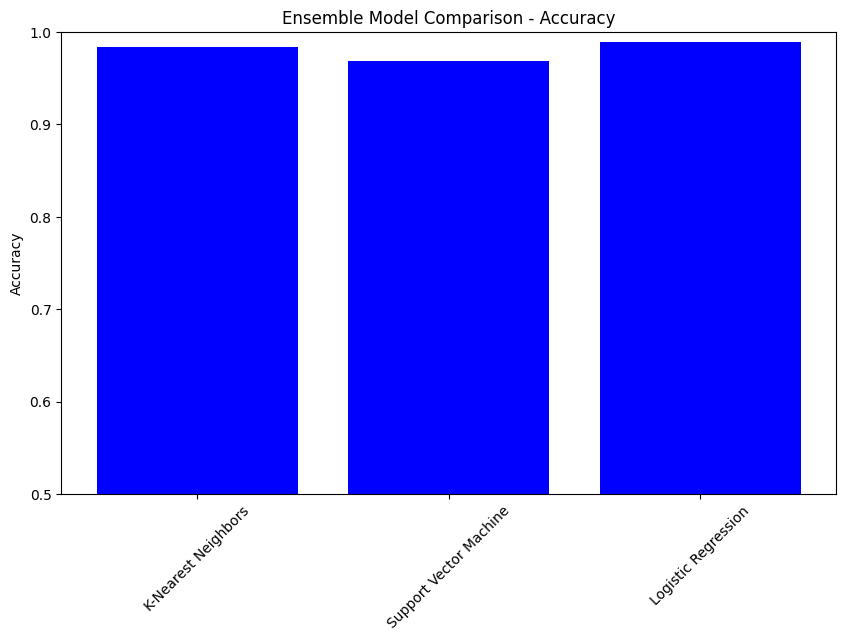

In [ ]:
# Create a bar plot to compare model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='blue')
plt.title('Ensemble Model Comparison - Accuracy')
plt.ylim(0.5, 1.0)
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()